In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score,roc_curve,classification_report

In [2]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.shape

(30000, 25)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [3]:
df = df.rename(columns ={'PAY_0':'PAY_1','default.payment.next.month':'defaulted'})

In [4]:
num_f = [features for features in df.columns if df[features].dtype != '0']
num_f

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'defaulted']

In [5]:
cat_f = [features for features in df.columns if df[features].dtype == 'O']
cat_f

[]

Hence there's no categorical features present in the dataset

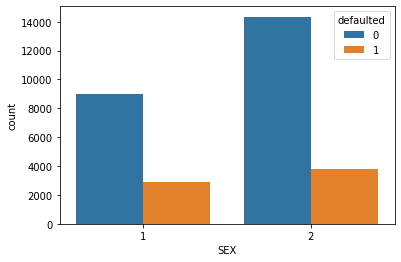

In [ ]:
sns.countplot(x='SEX',hue='defaulted',data=df)

Female(2) are has less deafaultors as compared to Men(1) 

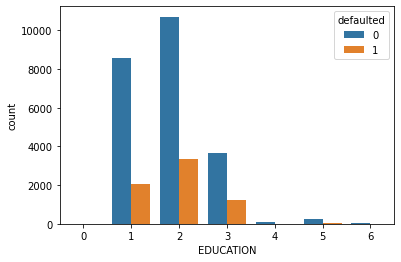

In [ ]:
sns.countplot(data=df,x='EDUCATION',hue='defaulted')

University graduate are less defaultors than graduate school and high school
And we can see there are 2 categories(5 and 6) both are used for unknown

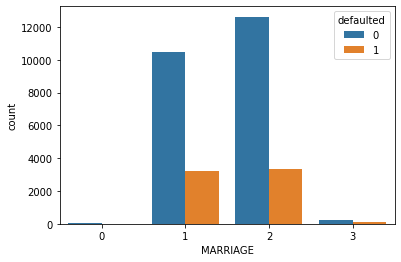

In [ ]:
sns.countplot(data=df,x='MARRIAGE',hue='defaulted')

Most defaultors are Married

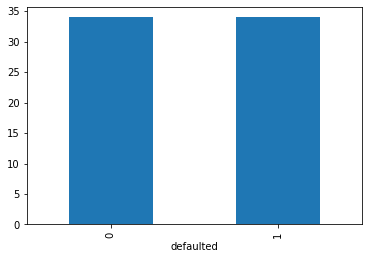

In [ ]:
df.groupby('defaulted')['AGE'].median().sort_values(ascending = False).plot(kind='bar')

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

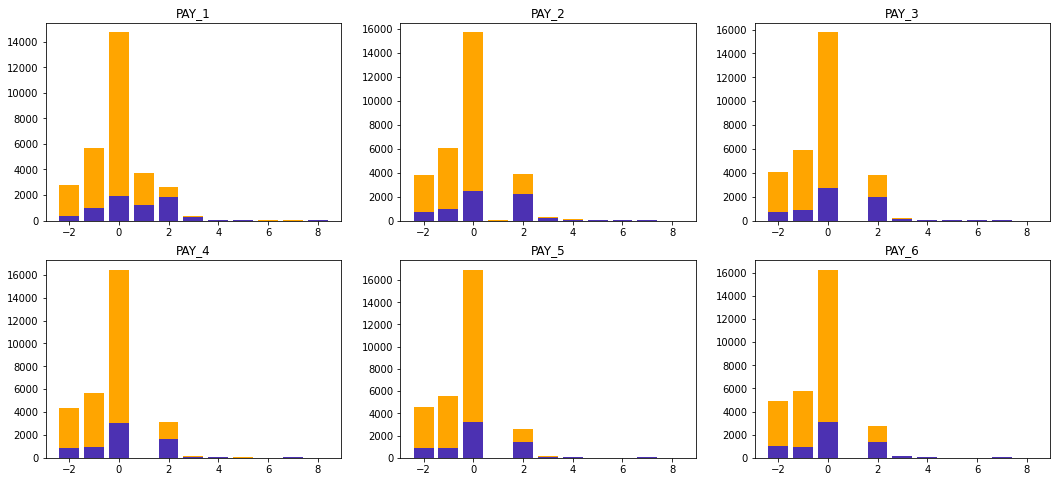

In [ ]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['defaulted']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='orange')
    ax[row,col].bar(x.index, x, align='center', color='blue', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

plt.show()

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

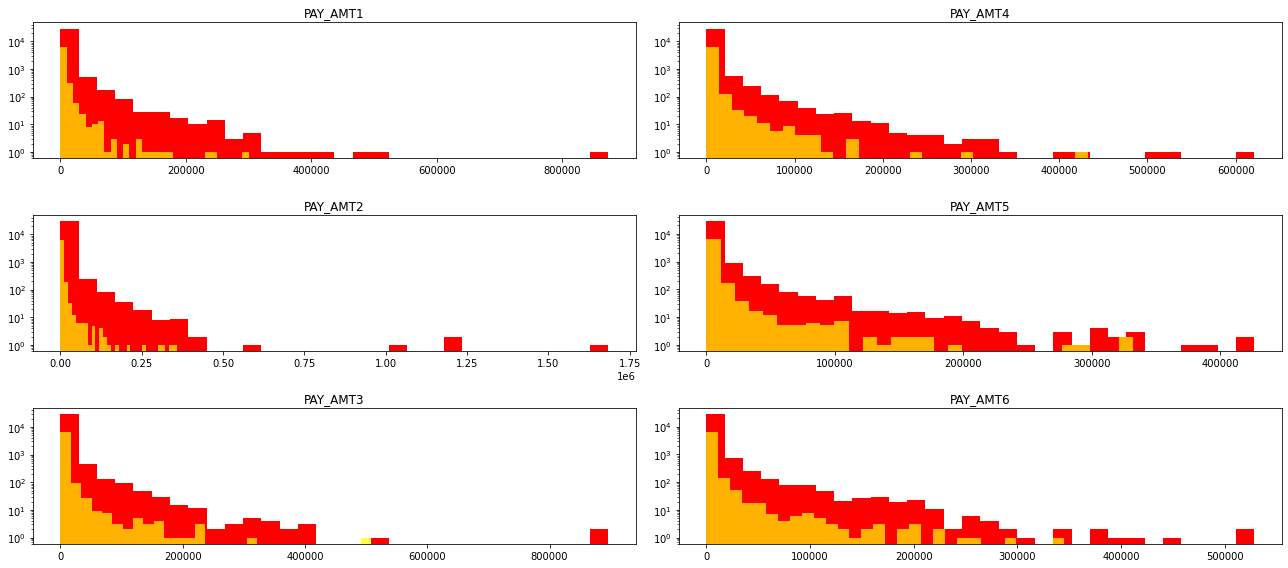

In [ ]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['defaulted']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

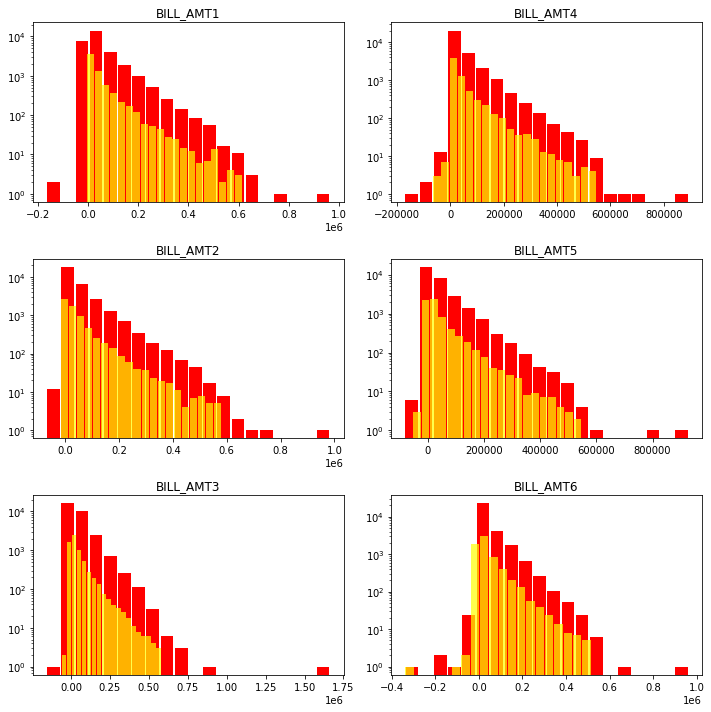

In [ ]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['defaulted']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

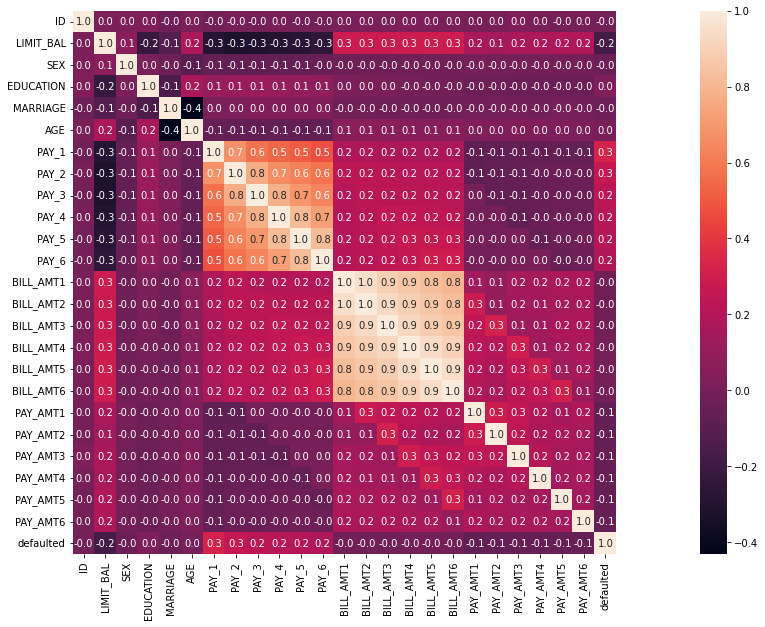

In [ ]:
plt.subplots(figsize=(30,10))
sns.heatmap( df.corr(), square=True, annot=True, fmt=".1f" )  

So it looks like 
1.   PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL variables.

2.   BILL_AMT_X are correlated with each other
3.   Marriage and age are strongly correlated



In [6]:
df.drop(['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  PAY_AMT1   30000 non-null  float64
 12  PAY_AMT2   30000 non-null  float64
 13  PAY_AMT3   30000 non-null  float64
 14  PAY_AMT4   30000 non-null  float64
 15  PAY_AMT5   30000 non-null  float64
 16  PAY_AMT6   30000 non-null  float64
 17  defaulted  30000 non-null  int64  
dtypes: float64(6), int64(12)
memory usage: 4.1 MB


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text major ticklabel objects>)

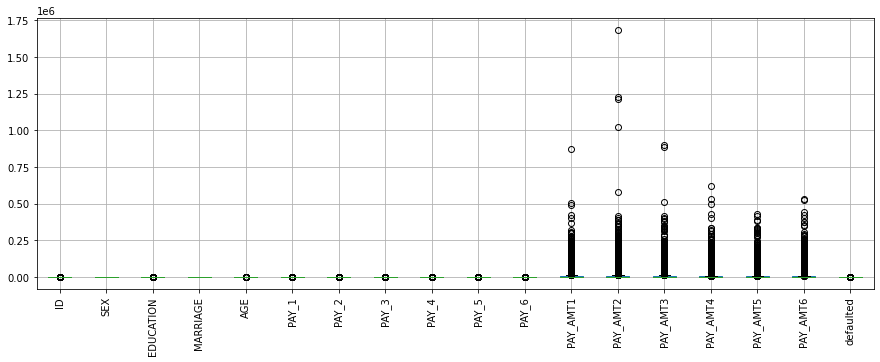

In [ ]:
plt.figure(figsize=(15,5))
df.boxplot()
plt.xticks(rotation=90)

**FEATURE ENGINEERING**

In [8]:
df['MARRIAGE'].replace(0, 3, inplace=True)

In [9]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)

In [10]:
df.drop(['ID'],axis=1,inplace=True)

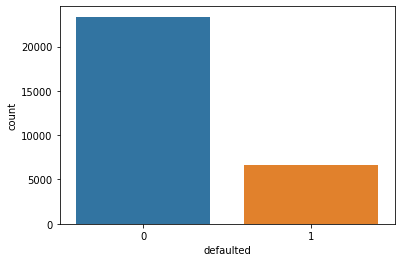

In [11]:
sns.countplot(data=df,x='defaulted')

defaulted is imbalance

**MODELLING**

In [12]:
x = df.drop(['defaulted'],axis=1)
y = df['defaulted']

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
arr = sc.fit_transform(x)

In [14]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif['Column']= x.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
vif

,vif,Column
0,1.021822,SEX
1,1.063885,EDUCATION
2,1.216622,MARRIAGE
3,1.253122,AGE
4,1.902089,PAY_1
5,3.112950,PAY_2
6,3.627622,PAY_3
7,4.271510,PAY_4
8,4.699905,PAY_5
9,3.178084,PAY_6


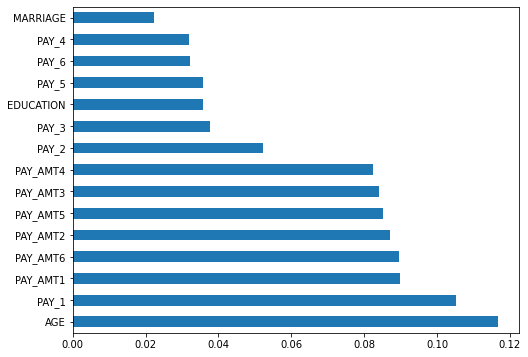

In [16]:
#Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [17]:
#Selecting top 10 features
ranked_features.nlargest(10).index

Index(['AGE', 'PAY_1', 'PAY_AMT1', 'PAY_AMT6', 'PAY_AMT2', 'PAY_AMT5',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_2', 'PAY_3'],
      dtype='object')

In [18]:
x = df[['AGE', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT6', 'PAY_AMT3','PAY_AMT5', 'PAY_AMT4', 'PAY_2','PAY_3']]
x.head()

,AGE,PAY_1,PAY_AMT1,PAY_AMT2,PAY_AMT6,PAY_AMT3,PAY_AMT5,PAY_AMT4,PAY_2,PAY_3
0,24,2,0.0,689.0,0.0,0.0,0.0,0.0,2,-1
1,26,-1,0.0,1000.0,2000.0,1000.0,0.0,1000.0,2,0
2,34,0,1518.0,1500.0,5000.0,1000.0,1000.0,1000.0,0,0
3,37,0,2000.0,2019.0,1000.0,1200.0,1069.0,1100.0,0,0
4,57,-1,2000.0,36681.0,679.0,10000.0,689.0,9000.0,0,-1


In [19]:
#Removing Overfitting
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.35,random_state=400)

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred = log_reg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63     15281
           1       0.64      0.70      0.67     15093

    accuracy                           0.65     30374
   macro avg       0.65      0.65      0.65     30374
weighted avg       0.65      0.65      0.65     30374



In [66]:
from sklearn.svm import SVC
svm_clas = SVC()
svm_clas.fit(x_train,y_train)

SVC()

In [67]:
y_pred = svm_clas.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51     15281
           1       0.57      0.76      0.65     15093

    accuracy                           0.59     30374
   macro avg       0.61      0.59      0.58     30374
weighted avg       0.61      0.59      0.58     30374



In [68]:
from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier()
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dr.predict(x_test)
#Accuracy,Precision,Recall,F1_Score,Recall,fpr3,tpr3,thre3 = result(y_test,y_pred)
#print('Accuracy - {:.2%}  Precision - {:.2%}  Recall - {:.2%}  F1_Score - {:.2%}'.format(Accuracy,Precision,Recall,F1_Score,Recall,fpr3,tpr3,thre3))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70     15281
           1       0.69      0.73      0.71     15093

    accuracy                           0.70     30374
   macro avg       0.70      0.70      0.70     30374
weighted avg       0.70      0.70      0.70     30374



In [70]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     15281
           1       0.81      0.77      0.79     15093

    accuracy                           0.80     30374
   macro avg       0.80      0.80      0.80     30374
weighted avg       0.80      0.80      0.80     30374



In [56]:
param={'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
from sklearn.model_selection import RandomizedSearchCV
ran_cv = RandomizedSearchCV(estimator = rf,param_distributions = param,n_iter = 5,random_state = 42,cv=5)
ran_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [300, 500, 700, 1000,
                                                         2100]},
                   random_state=42)

In [57]:
ran_cv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 2100}

In [58]:
rf1 = RandomForestClassifier(max_depth=15,max_features= 'auto',min_samples_split= 4,n_estimators= 2100)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=2100)

In [59]:
y_pred = rf1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     15217
           1       0.81      0.71      0.76     15157

    accuracy                           0.77     30374
   macro avg       0.78      0.77      0.77     30374
weighted avg       0.78      0.77      0.77     30374



In [60]:
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(x_train,y_train)

pred = GradientBoost.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     15217
           1       0.77      0.67      0.72     15157

    accuracy                           0.73     30374
   macro avg       0.74      0.73      0.73     30374
weighted avg       0.74      0.73      0.73     30374



In [61]:
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(x_train,y_train)

pred = AdaBoost.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73     15217
           1       0.74      0.66      0.70     15157

    accuracy                           0.71     30374
   macro avg       0.72      0.71      0.71     30374
weighted avg       0.72      0.71      0.71     30374



In [62]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()

xg_reg.fit(x_train,y_train)

pred = xg_reg.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     15217
           1       0.77      0.66      0.71     15157

    accuracy                           0.73     30374
   macro avg       0.74      0.73      0.73     30374
weighted avg       0.74      0.73      0.73     30374



In [82]:
import pickle
# open a file, where you ant to store the data
file = open('cred_rf_final.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [83]:
model = open('cred_rf_final.pkl','rb')
Forest = pickle.load(model)